In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw = pd.read_csv('./data/boston.csv')
raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Q1. Will housing prices be low in places with high crime rates?

In [8]:
# First, correlation coefficients and covariance are for continuous data so, eliminate categorical variables
data = raw.drop(['chas', 'rad'], axis = 1)
data.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


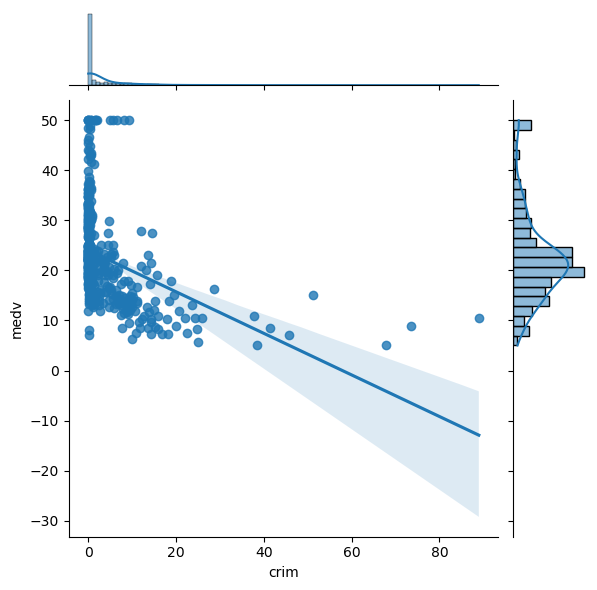

In [10]:
sns.jointplot( data = data, x = 'crim', y = 'medv', kind = 'reg')

In [13]:
# Check correlation coefficients and covariance between crim and medv.
data['crim'].cov(data['medv'])

-30.718507964458183

In [15]:
data['crim'].corr(data['medv'])

-0.38830460858681165

# Q2. Will a place with a large number of rooms be expensive?

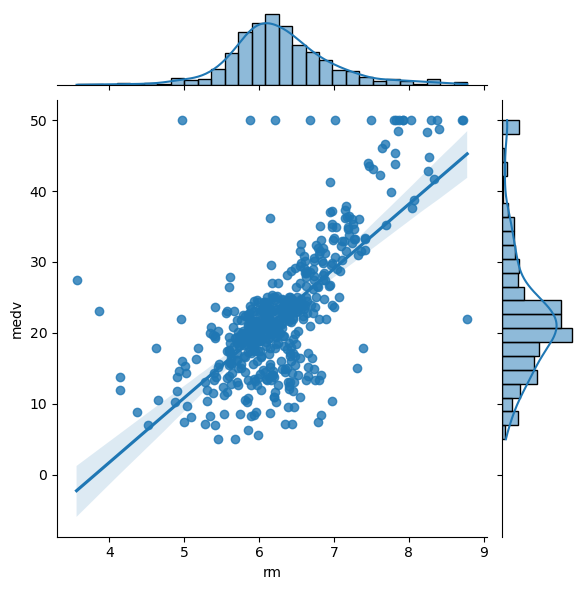

In [16]:
sns.jointplot(data = data, x = 'rm', y = 'medv', kind = 'reg')

In [17]:
data['rm'].cov(data['medv'])

4.493445879544475

In [18]:
data['rm'].corr(data['medv'])

0.6953599470715393

Now, let's check the correlation coefficients of all the data

<Axes: >

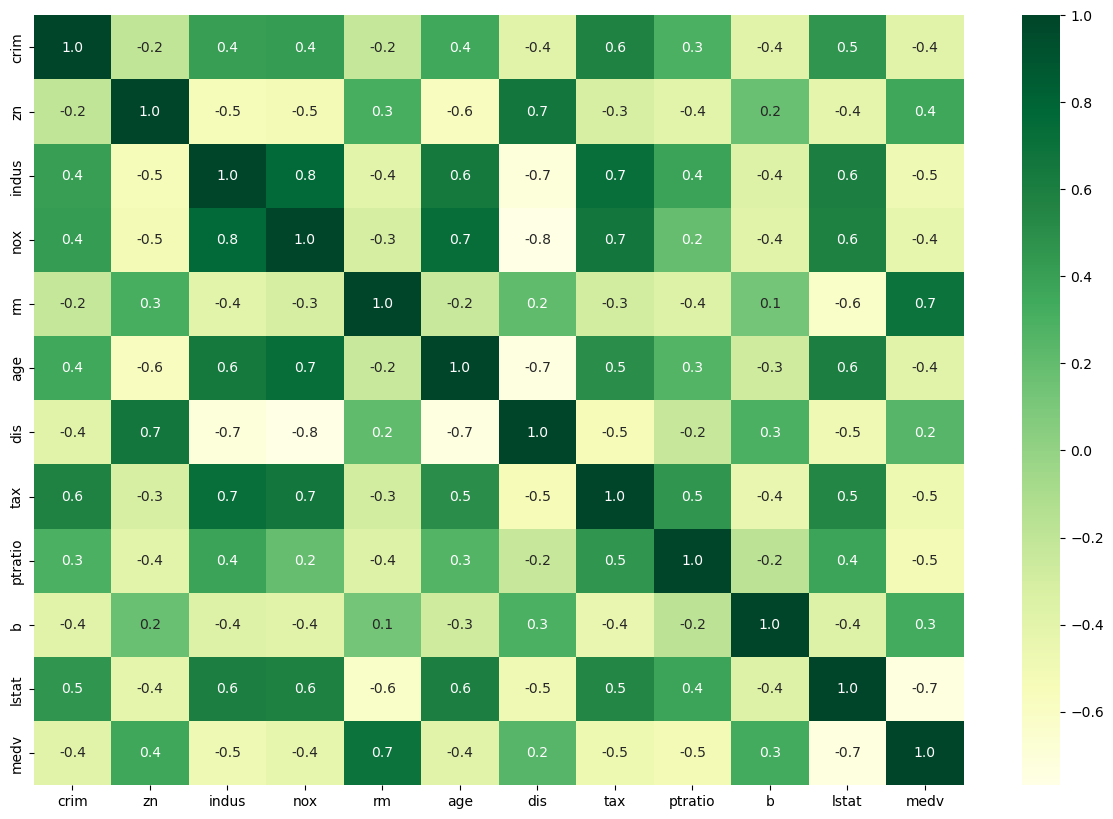

In [22]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), cmap = 'YlGn', annot = True, fmt = '0.1f')

# Feature Extraction

In [36]:
corr_list = [ ]

for col in data.columns:
    print( f"correlation coefficients between {col} and medv : {data[col].corr(data['medv'])}\n" )
    corr_list.append( abs(data[col].corr(data['medv'])))

correlation coefficients between crim and medv : -0.38830460858681165

correlation coefficients between zn and medv : 0.36044534245054305

correlation coefficients between indus and medv : -0.4837251600283728

correlation coefficients between nox and medv : -0.42732077237328264

correlation coefficients between rm and medv : 0.6953599470715393

correlation coefficients between age and medv : -0.3769545650045963

correlation coefficients between dis and medv : 0.24992873408590394

correlation coefficients between tax and medv : -0.46853593356776724

correlation coefficients between ptratio and medv : -0.5077866855375622

correlation coefficients between b and medv : 0.33346081965706653

correlation coefficients between lstat and medv : -0.737662726174015

correlation coefficients between medv and medv : 1.0



<Axes: >

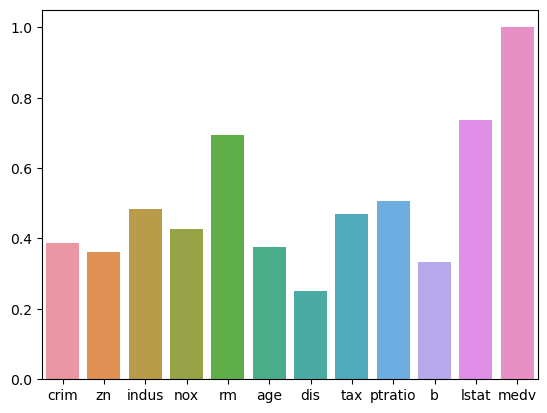

In [37]:
sns.barplot(x = data.columns, y = corr_list)

In [38]:
# Let's select two variables with relatively low correlation coefficient.
x = data[ ['dis', 'b'] ]

In [44]:
# import the library for PCA and normalization.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [46]:
# Create a object for normalization.
scaler = StandardScaler()

In [47]:
# Train x and transform it to normalized x.
scaler.fit(x)
scaled_x = scaler.transform(x)

In [48]:
# Let's make one variable by combining two variables.
pca = PCA(n_components = 1)

In [53]:
# Train scaled_x.
pca.fit(scaled_x)

PCA(n_components=1)

In [54]:
pca.components_

array([[-0.70710678, -0.70710678]])

In [56]:
# the new variance pc1's variance ratio
pca.explained_variance_ratio_

array([0.64575584])

In [57]:
data['pc1'] = pca.transform(scaled_x)

In [58]:
data.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,-1.073946


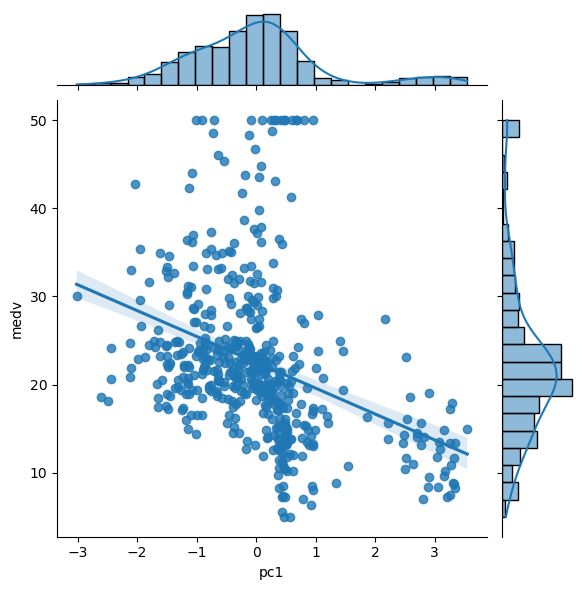

In [60]:
sns.jointplot(data = data, x = 'pc1', y = 'medv', kind = 'reg')

In [61]:
data['pc1'].corr(data['medv'])

-0.362989851000902